<h1>Simple Linear Regression. Minimal Example</h1>

Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

Generate Random Input Data to train on 

In [2]:
observations = 100000 #size of data
#np.random.uniform(low,high,size) i.e. random value from a uniform distribution (equal probility for num to be picked)
xs = np.random.uniform(0,10,(observations,1))
zs = np.random.uniform(0,10, (observations,1)) #we are creating a two variable model

#lets combine into one matrix
inputs = np.column_stack((xs,zs))
print(inputs.shape)

(100000, 2)


Create the targets we will aim at

In [3]:
#let the target be defined as targets = f(x,z) = 2*x - 3*z + 5 + noise
#obviously the weights are 2 and 3, and the bias is 5

noise = np.random.uniform(-1,1,(observations,1))
targets = 13*xs +7*zs -12 + noise
print(targets.shape)

(100000, 1)


Plot the training data

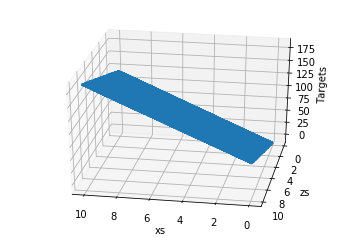

In [4]:
targets = targets.reshape(observations,)
fig = plt.figure();
ax = fig.add_subplot(111,projection='3d')
ax.plot(xs,zs,targets)
ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('Targets')
ax.view_init(azim=100)
plt.show()
targets = targets.reshape(observations,1)

Initialize Variables

In [5]:
init_range = 0.1
#our initial weights and biases will be picked randomly from the interval [-0.1,0.1]
weights = np.random.uniform(-init_range,init_range, size=(2,1)) #the size is 2x1 because we have two variables soo 1 weight per var

biases = np.random.uniform(-init_range, init_range, size= 1)


Set A Learning Rate

In [6]:
learning_rate = 0.02

Train the Model

In [7]:
#We want to minimize the loss function w/r to the weights and biases
#Game Plan: Calculate Outputs, compare output to targets via the loss, print the loss, adjust weight and biases
for i in range(100):
    outputs = np.dot(inputs,weights) + biases
    deltas = outputs - targets
    loss = np.sum(deltas ** 2) / 2 / observations #equal mean loss
    print(loss)
    deltas_scaled = deltas/observations
    weights = weights - learning_rate*np.dot(inputs.T,deltas_scaled) #we transposed inputs so that we are able to multiply matrices
    biases = biases- learning_rate * np.sum(deltas_scaled)
    

4755.21998678
223.216456651
55.2727426091
38.8018550398
30.7087322538
25.1788426537
21.3200609873
18.6185085103
16.720790424
15.3815494287
14.4303579755
13.7488325832
13.254740667
12.8909608967
12.6178148087
12.4077401648
12.2415909432
12.1060672261
11.9919299392
11.8927607684
11.8041007692
11.7228520243
11.6468620214
11.5746349516
11.5051311716
11.4376279045
11.3716224798
11.3067651212
11.2428122602
11.1795941057
11.1169921177
11.0549233598
10.9933296299
10.9321699103
10.8714151234
10.8110444888
10.7510429926
10.6913996299
10.6321061836
10.5731563765
10.5145452821
10.456268915
10.3983239471
10.3407075099
10.2834170569
10.2264502691
10.169804988
10.1134791699
10.0574708541
10.0017781403
9.94639917323
9.89133213209
9.83657522287
9.7821266732
9.7279847287
9.67414765044
9.62061371311
9.56738120383
9.51444842122
9.46181367477
9.40947528438
9.35743158006
9.30568090163
9.25422159857
9.20305202987
9.15217056389
9.10157557828
9.05126545991
9.00123860476
8.95149341789
8.90202831337
8.8528417141

Print Weights and Biases and see if we have worked correctly

In [8]:
print(weights,biases)

[[ 12.12680429]
 [  6.1264615 ]] [-1.83823216]


Plot last outputs vs targets

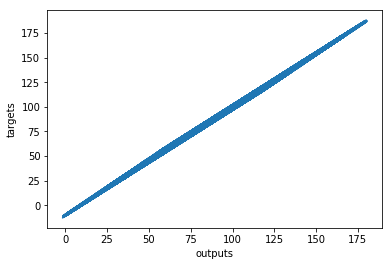

In [9]:
plt.plot(outputs, targets)
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()